In [1]:
# This file accepts X_test,  y_test, and y_pred (predicted labels from classifier)  data for visualizations.
# also takes in y_score which is the probability from the classifier (log reg, svm) that the data point
# belongs to the positive class
#
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import numpy as np
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


In [2]:
#Produce ROC visualization
%store -r X_test
%store -r y_test
%store -r y_pred
%store -r y_score

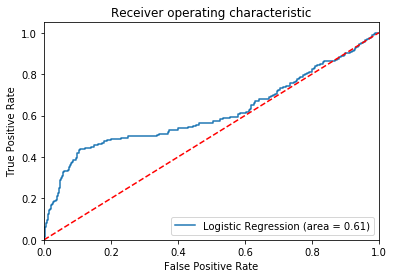

In [3]:
#
#
# ROC
#
# explanation
# https://stackoverflow.com/questions/36681449/scikit-learn-return-value-of-logisticregression-predict-proba
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
logit_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score) # gets false pos rate, true pr, and thresh
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[[3263    0]
 [ 160    0]]


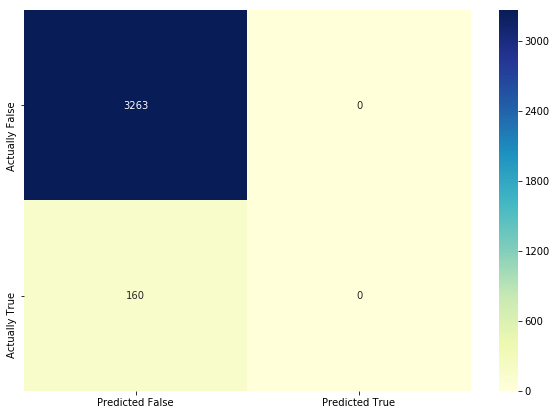

In [4]:
#
#
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
df_cm = pd.DataFrame(confusion_matrix, index = ["Actually False", "Actually True"],
                  columns = ["Predicted False", "Predicted True"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt="d",cmap="YlGnBu")

NameError: name 'animation' is not defined

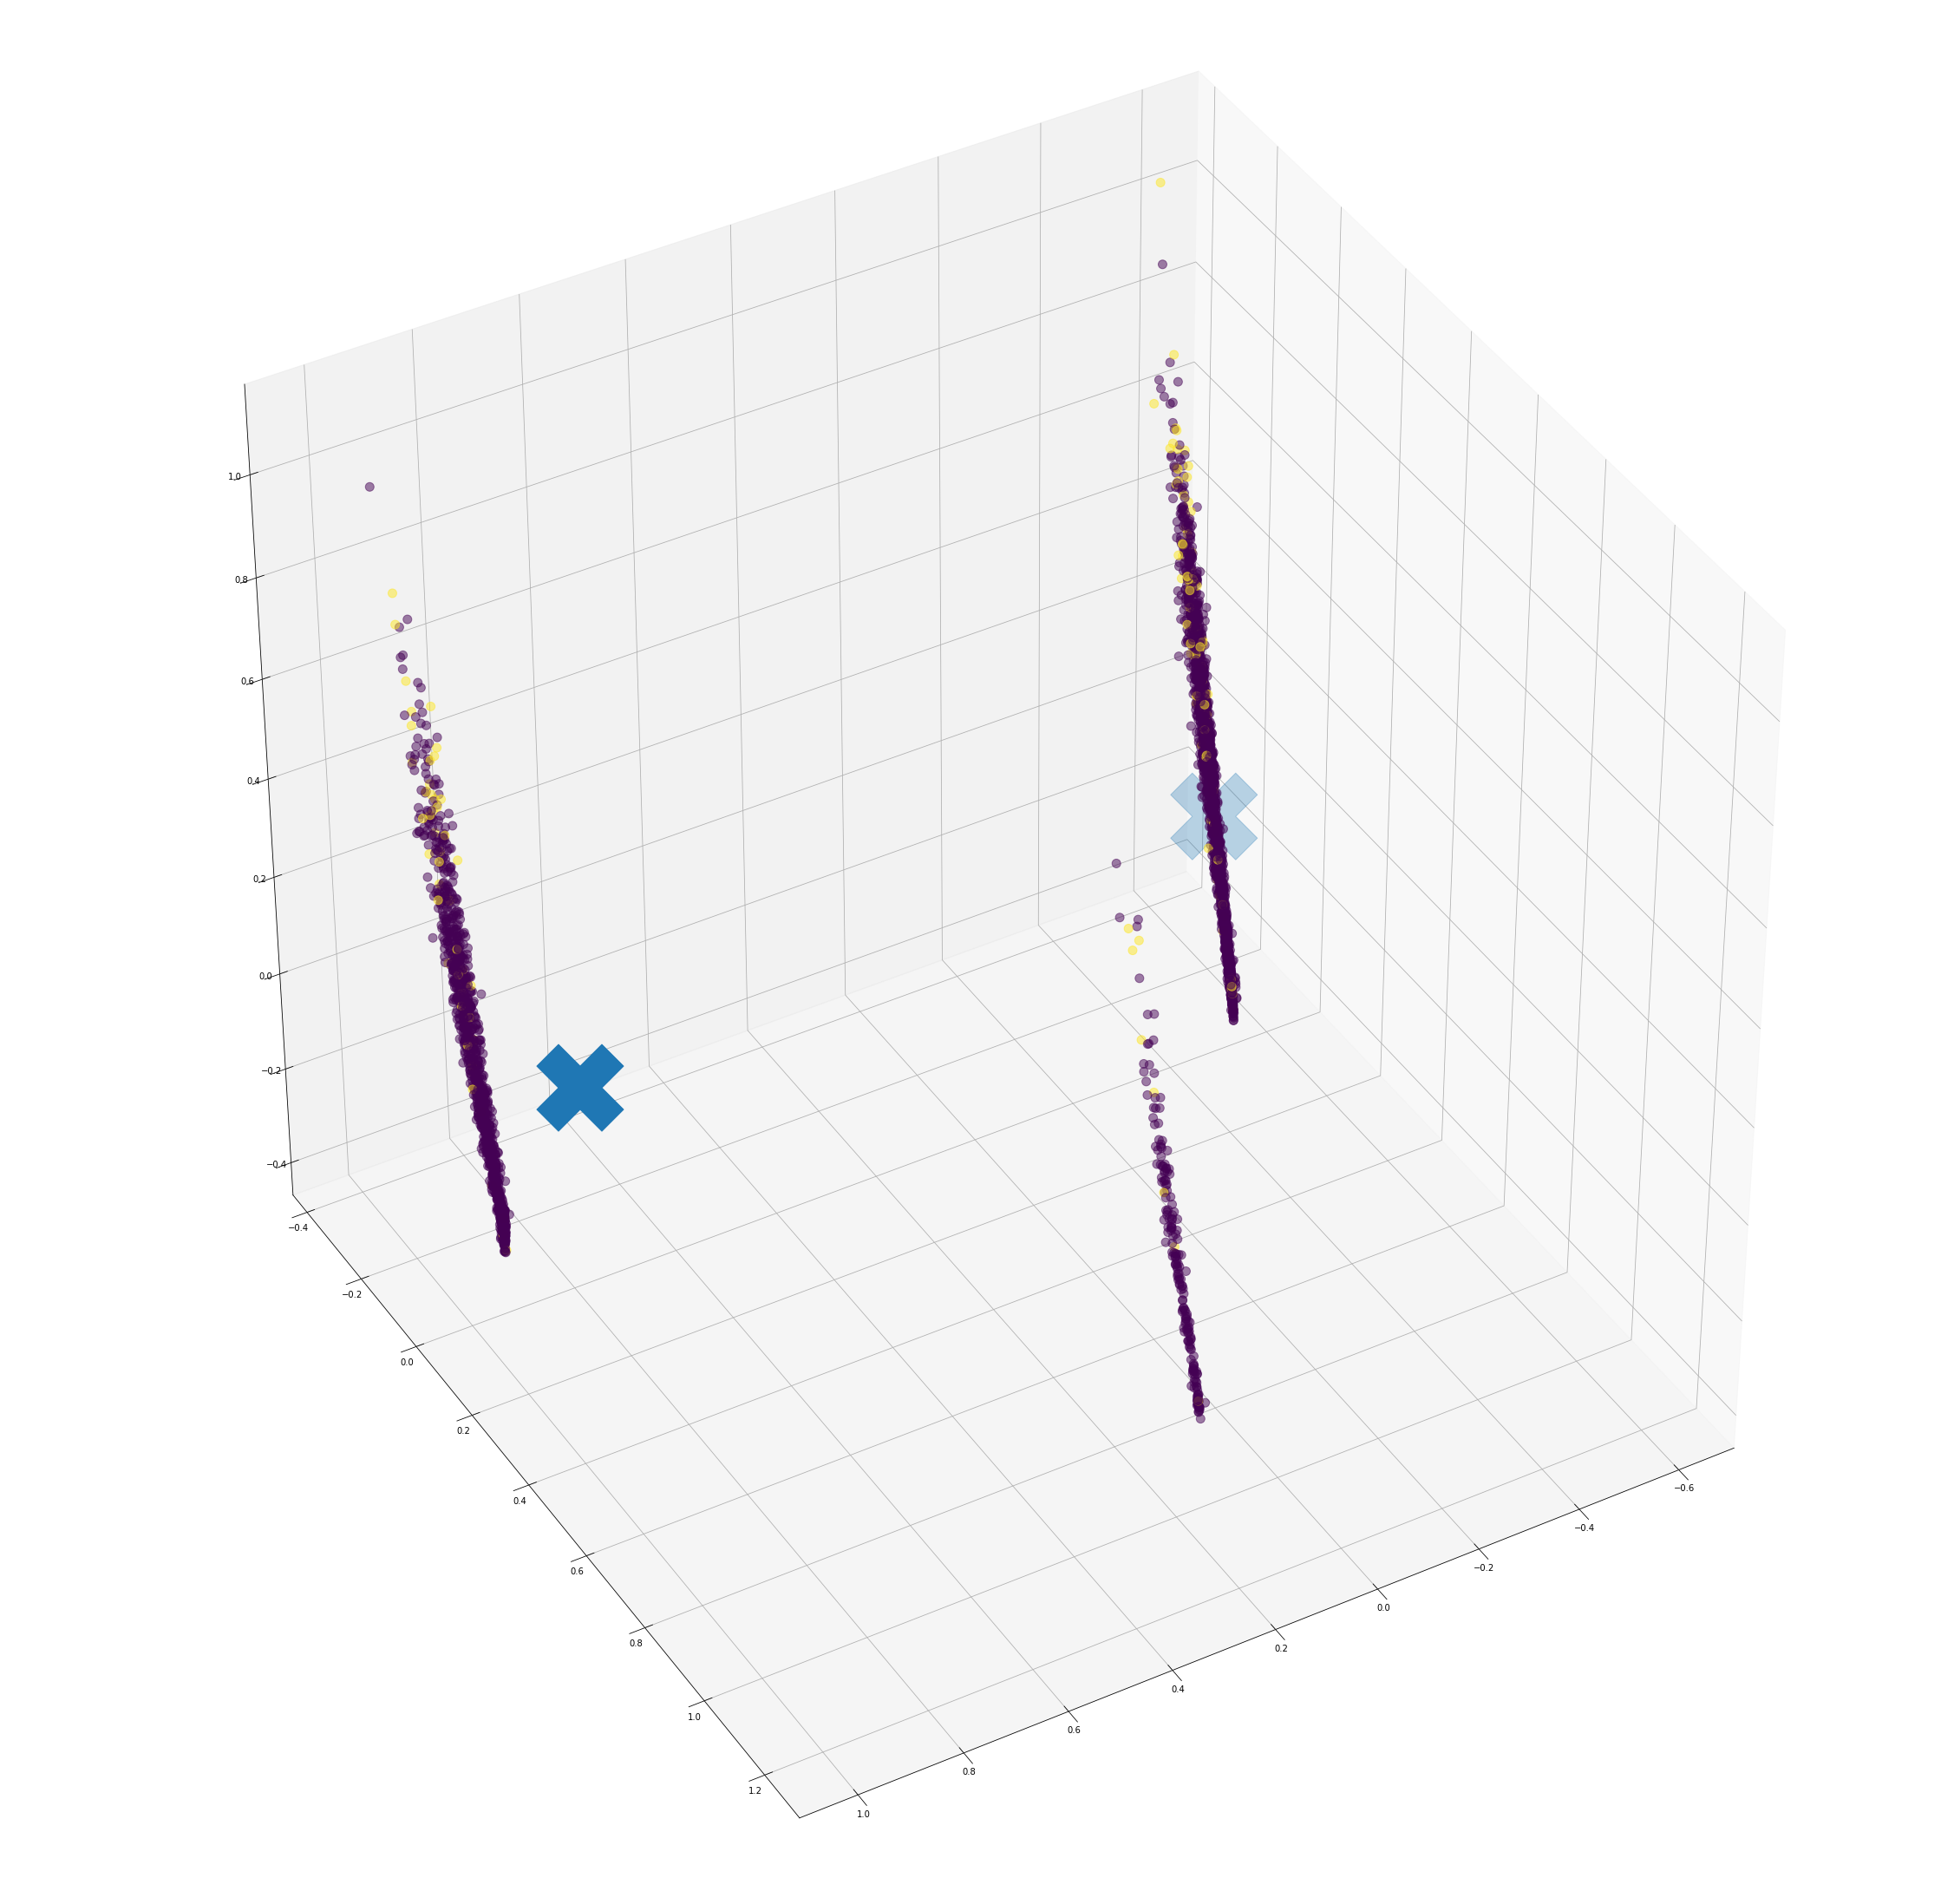

In [5]:
#
#
# Scatter Plot 3D
#
#
#
pca = PCA(n_components=3)
_3DPCA = pca.fit_transform(X_test)
kmeans = KMeans(n_clusters=2, random_state=0).fit(_3DPCA)


fig =plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(_3DPCA[:,0], _3DPCA[:,1], _3DPCA[:,2], 
           s=100, c=y_test.values.ravel(), alpha=0.5)
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2],marker='X',s=10000)
ax.view_init(40, 60)
rot_animation = animation.FuncAnimation(fig, animate, frames=np.arange(0,362,2),interval=100)
rot_animation.save('rotation1.gif', dpi=80, writer='imagemagick')



In [ ]:
#dir(pca)

In [ ]:
#pca.explained_variance_ratio_

In [ ]:
#pca.components_


In [ ]:
#
#
# Scatter Plot 2D
#
#
#
pca = PCA(n_components=2)
_2DPCA = pca.fit_transform(X_test)
kmeans = KMeans(n_clusters=3, random_state=0).fit(_2DPCA)
plt.figure(2, figsize=(30, 20),)
plt.scatter(_2DPCA[:,0], _2DPCA[:,1],s=100, c=y_test.values.ravel(), alpha=0.4)
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],marker='.',s=10000)

In [ ]:
#
#
# Tsne
#
#
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42,perplexity=10)
X_reduced_tsne = tsne.fit_transform(X_test)
plt.figure(2, figsize=(30, 20),)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1],s=100, c=y_test.values.ravel(), alpha=0.4)